<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGTI_Mod_5_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris

In [ ]:
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [ ]:
iris = datasets.load_iris()

In [ ]:
df_iris = pd.DataFrame(data= np.c_[iris['data'],iris['target']],
                       columns=iris['feature_names']+['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
x=df_iris.iloc[:, :-1]
y=df_iris.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) 

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree = DecisionTreeClassifier()
tree = tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)

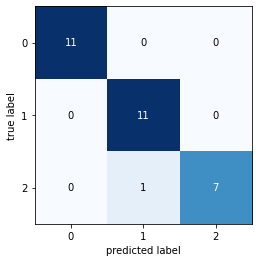

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


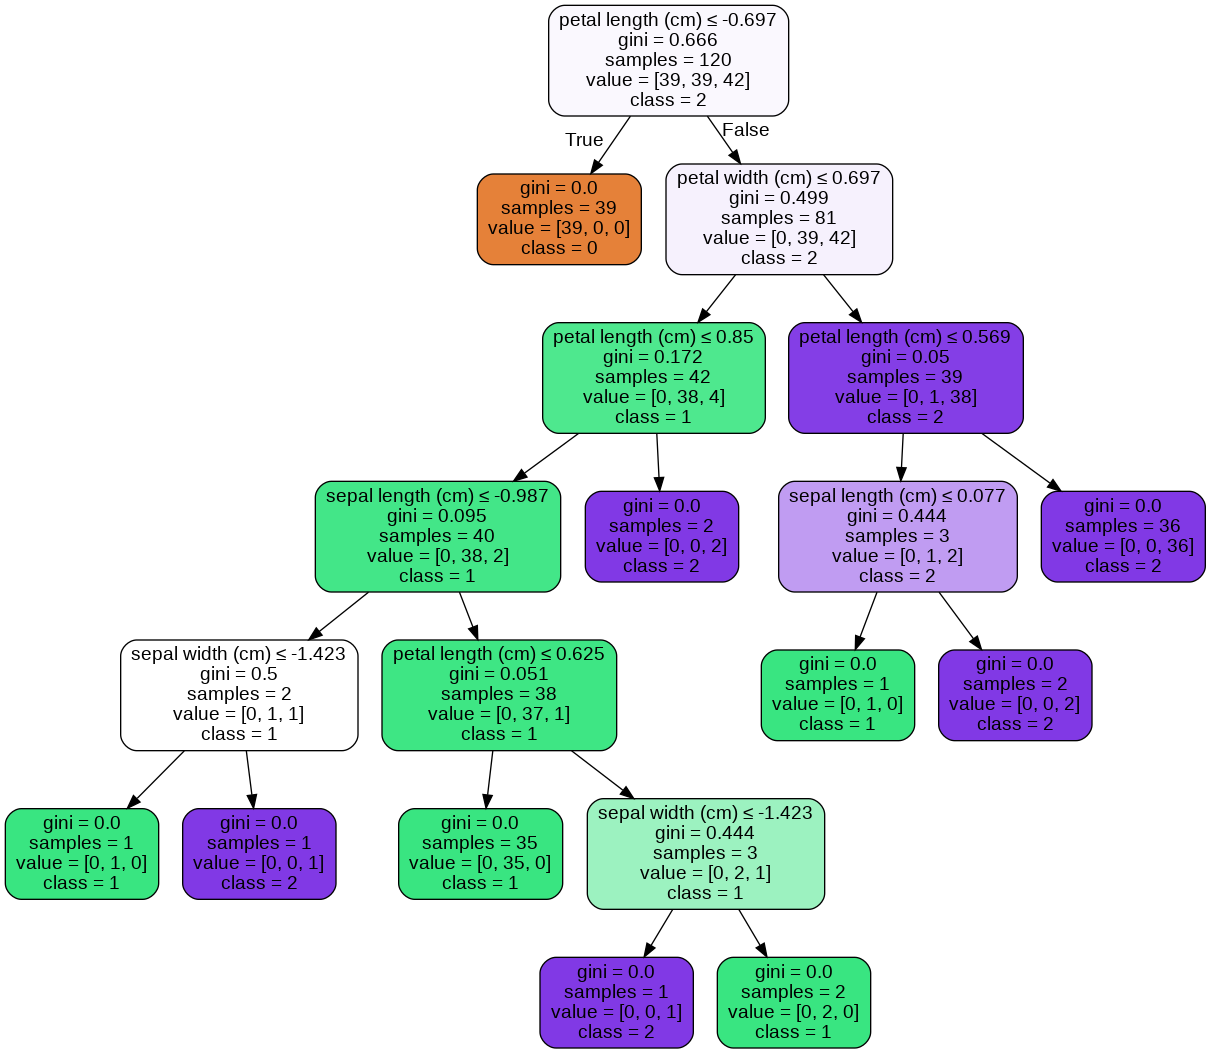

In [ ]:
dot_data = StringIO()
export_graphviz(tree,out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names=iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())